# Market Basket Analysis Code

Association rules are normally written like this: {A} -> {B} which means that there is a strong relationship between customers that purchased A and also purchased B in the same transaction.
In the above example, the {A} is the antecedent and the {B} is the consequent. Both antecedents and consequents can have multiple items. In other words, {A, C} -> {B, D} is a valid rule.

# STEP 1 : Install the required packages

In [1]:
#!pip install mlxtend

# Step 2 : Load the required packages

In [2]:
import pandas as pd
import numpy as np
#Packages for MBA
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Step 3: Load the dataset

In [3]:
df = pd.read_excel(r'C:\Users\Desktop\Market basket Analysis\Online Retail.xlsx')
df.head()

,InvoiceNo,Description,Quantity,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,United Kingdom
1,536365,WHITE METAL LANTERN,6,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,United Kingdom


# Step 4: Data Cleanse

In [4]:
# Checking different values for Country
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [5]:
# Since the data is quite large and the space is limited, hence selecting the country with minimum number of records for easier processing
df=df[df['Country'] =="Saudi Arabia"]

1) Removing extra spaces from the description
2) Removing blank invoice numbers

In [6]:
#Data Cleaning :
#1. Removing extra spaces from the description 
#2. Removing blank invoice numbers
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

# Step 5 : Basket Creation

After cleanup, we need to consolidate the items into 1 transaction per row with each product 1 hot encoded.
There are a lot of 0s in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0. 

In [7]:
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

In [8]:
def encode_0_1(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_0_1)

In [9]:
basket_sets

Description,ASSORTED BOTTLE TOP MAGNETS,GLASS JAR DAISY FRESH COTTON WOOL,GLASS JAR MARMALADE,GLASS JAR PEACOCK BATH SALTS,GOLD EAR MUFF HEADPHONES,HOMEMADE JAM SCENTED CANDLES,PLASTERS IN TIN CIRCUS PARADE,PLASTERS IN TIN SKULLS,PLASTERS IN TIN STRONGMAN
InvoiceNo,,,,,,,,,
544838,1,1,1,1,1,1,1,1,1
C545507,0,0,0,0,0,0,0,0,0


Now that we have structured the data properly, we can generate frequent item sets that have a support of at least 1% (this number was chosen so that I could get enough useful examples)

In [10]:
frequent_itemsets = apriori(basket_sets,min_support=0.01, use_colnames=True)

In [11]:
frequent_itemsets.shape

(511, 2)

# Step 6 : Generate Rules

The final step is to generate the rules with their corresponding support, confidence and lift

In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GLASS JAR DAISY FRESH COTTON WOOL),(ASSORTED BOTTLE TOP MAGNETS),0.5,0.5,0.5,1.0,2.0,0.25,inf
1,(ASSORTED BOTTLE TOP MAGNETS),(GLASS JAR DAISY FRESH COTTON WOOL),0.5,0.5,0.5,1.0,2.0,0.25,inf
2,(GLASS JAR MARMALADE),(ASSORTED BOTTLE TOP MAGNETS),0.5,0.5,0.5,1.0,2.0,0.25,inf
3,(ASSORTED BOTTLE TOP MAGNETS),(GLASS JAR MARMALADE),0.5,0.5,0.5,1.0,2.0,0.25,inf
4,(GLASS JAR PEACOCK BATH SALTS),(ASSORTED BOTTLE TOP MAGNETS),0.5,0.5,0.5,1.0,2.0,0.25,inf


# That’s all there is to it! Build the frequent items using apriori algorithm then build the rules with association_rules .

# Step 7 : Visualizations

In [13]:
#!pip install wordcloud

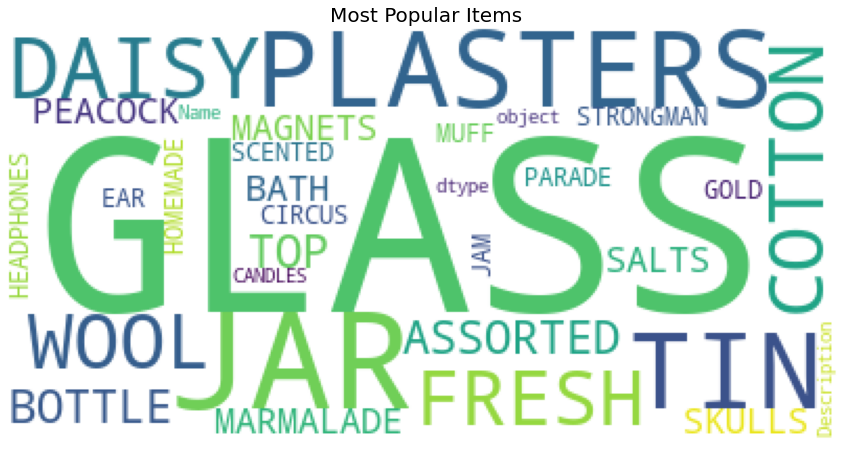

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white',  max_words = 121).generate(str(df['Description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

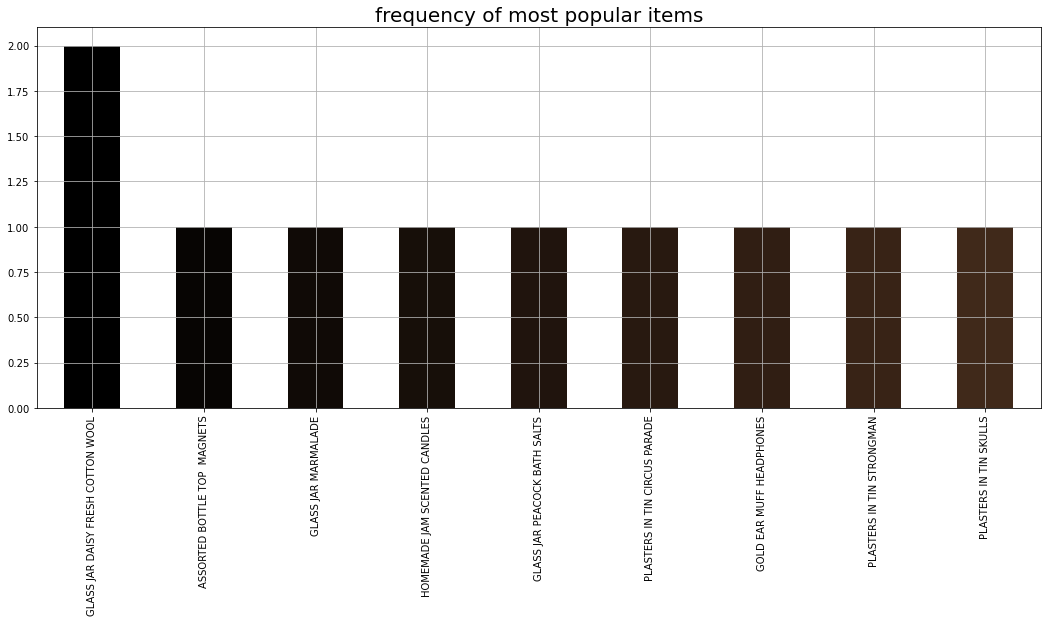

In [15]:
#barchart

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['Description'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

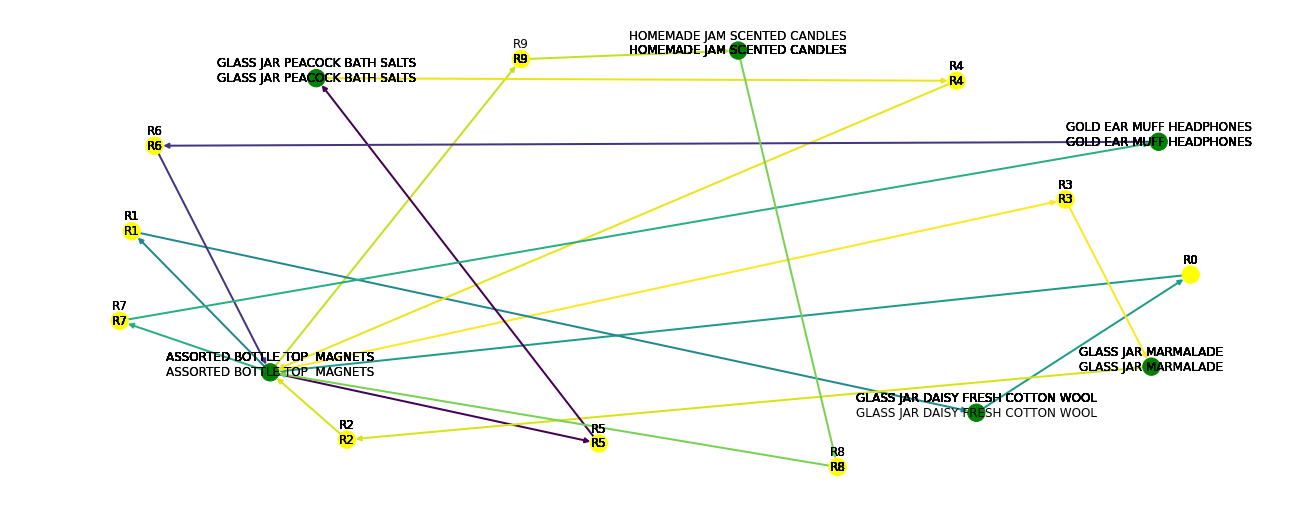

In [16]:
#plotting output in a graph plot.

import networkx as nx
import matplotlib.pyplot as plt  

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos)
        #plt.show()

draw_graph (rules, 10) 